In [1]:
cd drive/MyDrive/Dacon/LDI/Model

/content/drive/MyDrive/Dacon/LDI/Model


In [23]:
import pickle
import pandas as pd
import numpy as np
with open('../Preprocessed_data/v4/traindata.txt', 'rb') as f:
    X = pickle.load(f)

In [24]:
X.shape

(15000, 35)

In [25]:
X.head()

,err_1,err_2,err_3,err_4,err_5,err_7,err_8,err_13,err_14,err_15,err_20,err_22,err_23,err_24,err_25,err_26,err_27,err_30,err_31,err_32,err_33,err_34,err_37,err_38,err_39,err_40,err_41,err_42,23_as,23_ac,quality_1,quality_5,quality_7,quality_9,quality_12
0,-0.196852,-0.030118,0.085244,0.009499,-0.296007,-0.073469,-0.052361,0.015363,-0.026017,-0.652306,-0.252677,-0.225553,-0.148116,-0.071956,-0.075181,-0.149787,-0.042665,-0.154519,-0.380584,-0.198956,-1.052305,-0.061546,-1.026064,-0.114398,-0.080131,-0.609719,-0.336841,-0.644371,-0.117827,-0.170355,-0.123124,-0.127080,-0.102644,-0.032144,-0.070201
1,-0.196852,-0.030118,-0.029046,-0.045789,0.042136,-0.073469,-0.052361,0.015363,-0.034766,0.560808,5.213885,1.147012,-0.148116,0.066194,0.877285,-0.590355,-0.045944,-0.154519,0.350362,-0.198956,-0.166879,0.083164,0.622496,-0.114398,-0.080131,0.781935,2.510621,-0.362551,0.898130,14.313508,-0.123124,-0.151099,-0.102644,-0.032144,-0.070201
2,-0.196852,-0.030118,-0.000473,0.023852,-0.288962,-0.073469,-0.052361,0.015363,-0.052263,-0.753398,-0.252677,-0.225553,-0.148116,-0.016696,-0.075181,-0.458185,-0.039385,-0.154519,-0.380584,-0.198956,-1.052305,-0.061546,-1.026064,-0.114398,-0.080131,-0.609719,-0.336841,-0.644371,-0.117827,-0.170355,-0.123124,-0.006985,0.275682,0.030609,-0.070201
3,-0.196852,-0.030118,-0.029046,-0.045789,-0.281918,-0.073469,-0.052361,-0.064734,-0.069761,-0.854491,-0.252677,-0.174717,-0.148116,-0.071956,-0.075181,0.951632,-0.045944,-0.154519,-0.191953,-0.198956,-0.343964,-0.061546,0.622496,0.641705,-0.080131,-0.389984,-0.285994,-0.644371,-0.021069,-0.170355,-0.123124,-0.151099,-0.102644,-0.032144,-0.070201
4,-0.196852,-0.030118,-0.029046,-0.045257,-0.296007,0.015953,-0.052361,0.175556,-0.047889,0.560808,-0.252677,0.028626,-0.088245,-0.071956,-0.075181,-0.105730,-0.045944,-0.154519,0.096888,-0.198956,0.364376,-0.061546,0.622496,-0.114398,-0.080131,-0.560889,-0.336841,-0.080732,-0.061385,-0.054484,-0.123124,-0.115070,0.023465,-0.032144,-0.070201


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
principalComponents = pca.fit_transform(X)
pc = []
for i in range(1,11):
    pc.append("pc_"+str(i))
X = pd.DataFrame(data=principalComponents, columns = pc)
# 주성분으로 이루어진 데이터 프레임 구성

In [26]:
train_problem_data = pd.read_csv('../dataset/train_problem_data.csv',thousands = ',')

In [27]:
df_tpd = train_problem_data.drop_duplicates()
problem_list = list(df_tpd['user_id'].unique())
y = np.zeros(15000,)
for pi in problem_list:
    y[pi-10000] = 1

In [28]:
X.head()

,err_1,err_2,err_3,err_4,err_5,err_7,err_8,err_13,err_14,err_15,err_20,err_22,err_23,err_24,err_25,err_26,err_27,err_30,err_31,err_32,err_33,err_34,err_37,err_38,err_39,err_40,err_41,err_42,23_as,23_ac,quality_1,quality_5,quality_7,quality_9,quality_12
0,-0.196852,-0.030118,0.085244,0.009499,-0.296007,-0.073469,-0.052361,0.015363,-0.026017,-0.652306,-0.252677,-0.225553,-0.148116,-0.071956,-0.075181,-0.149787,-0.042665,-0.154519,-0.380584,-0.198956,-1.052305,-0.061546,-1.026064,-0.114398,-0.080131,-0.609719,-0.336841,-0.644371,-0.117827,-0.170355,-0.123124,-0.127080,-0.102644,-0.032144,-0.070201
1,-0.196852,-0.030118,-0.029046,-0.045789,0.042136,-0.073469,-0.052361,0.015363,-0.034766,0.560808,5.213885,1.147012,-0.148116,0.066194,0.877285,-0.590355,-0.045944,-0.154519,0.350362,-0.198956,-0.166879,0.083164,0.622496,-0.114398,-0.080131,0.781935,2.510621,-0.362551,0.898130,14.313508,-0.123124,-0.151099,-0.102644,-0.032144,-0.070201
2,-0.196852,-0.030118,-0.000473,0.023852,-0.288962,-0.073469,-0.052361,0.015363,-0.052263,-0.753398,-0.252677,-0.225553,-0.148116,-0.016696,-0.075181,-0.458185,-0.039385,-0.154519,-0.380584,-0.198956,-1.052305,-0.061546,-1.026064,-0.114398,-0.080131,-0.609719,-0.336841,-0.644371,-0.117827,-0.170355,-0.123124,-0.006985,0.275682,0.030609,-0.070201
3,-0.196852,-0.030118,-0.029046,-0.045789,-0.281918,-0.073469,-0.052361,-0.064734,-0.069761,-0.854491,-0.252677,-0.174717,-0.148116,-0.071956,-0.075181,0.951632,-0.045944,-0.154519,-0.191953,-0.198956,-0.343964,-0.061546,0.622496,0.641705,-0.080131,-0.389984,-0.285994,-0.644371,-0.021069,-0.170355,-0.123124,-0.151099,-0.102644,-0.032144,-0.070201
4,-0.196852,-0.030118,-0.029046,-0.045257,-0.296007,0.015953,-0.052361,0.175556,-0.047889,0.560808,-0.252677,0.028626,-0.088245,-0.071956,-0.075181,-0.105730,-0.045944,-0.154519,0.096888,-0.198956,0.364376,-0.061546,0.622496,-0.114398,-0.080131,-0.560889,-0.336841,-0.080732,-0.061385,-0.054484,-0.123124,-0.115070,0.023465,-0.032144,-0.070201


In [29]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(X,y, test_size = 0.3, random_state = 11)
X_train, X_val,y_train, y_val = train_test_split(X_t,y_t,test_size=0.2, random_state = 10)

In [30]:
y_train

array([1., 0., 0., ..., 0., 0., 0.])

In [31]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
eval_set=[(X_val,y_val)]
nes = [100,200,500,1000]
lrs = [0.02,0.05,0.1,0.12]
mds = [3,5,7,10]
params = []
score = 0
for ne in nes:
    for lr in lrs:
        for md in mds:
            xgb = XGBClassifier(n_estimators = ne, learning_rate = lr, max_depth = md, objective= 'binary:logistic')
            xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
            xgb_pred = xgb.predict(X_test)
            xgb_probability = xgb.predict_proba(X_test)
            xgb_prob = xgb_probability[:,1]
            temp_score = roc_auc_score(y_test,xgb_prob)
            print(temp_score)
            if temp_score > score:
                score = temp_score
                params = [ne,lr,md]
print(score)
print(params)
            


0.7665607498220615
0.7720732486537785
0.7817988683830243
0.7808553674519925
0.7764863256957575
0.7832430460195696
0.7847499065373527
0.7821988930068371
0.7813496410674873
0.7831988983989131
0.78294378581237
0.779528916803865
0.7796345116217207
0.7824233381622367
0.7839910842026557
0.7802359527438476
0.7750194564068644
0.7805747548402868
0.7856476871589513
0.7835994846972889
0.7802908845161151
0.7842418157276068
0.7851528518688934
0.7821988930068371
0.7836076851459097
0.7831988983989131
0.78294378581237
0.779528916803865
0.782037804742151
0.7824233381622367
0.7839910842026557
0.7802359527438476
0.7802208998655575
0.7838831303516353
0.7867218335933511
0.7841417253204691
0.780658107345445
0.7842418157276068
0.7851528518688934
0.7821988930068371
0.7836076851459097
0.7831988983989131
0.78294378581237
0.779528916803865
0.782037804742151
0.7824233381622367
0.7839910842026557
0.7802359527438476
0.7802208998655575
0.7838831303516353
0.7867218335933511
0.7841417253204691
0.780658107345445
0.7842

In [32]:
xgb = XGBClassifier(n_estimators = params[0], learning_rate = params[1], max_depth = params[2], objective= 'binary:logistic')
xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
xgb_pred = xgb.predict(X_test)
xgb_probability = xgb.predict_proba(X_test)
xgb_prob = xgb_probability[:,1]
temp_score = roc_auc_score(y_test,xgb_prob)

AxesSubplot(0.125,0.125;0.775x0.755)


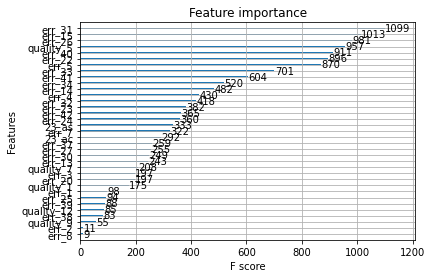

In [33]:
print(plot_importance(xgb))

In [34]:

from sklearn.metrics import roc_auc_score


roc_auc_score(y_test,xgb_pred)
roc_auc_score(y_test,xgb_prob)


0.7867218335933511

In [41]:
with open('../Preprocessed_data/v4/testdata.txt', 'rb') as f:
    testdata = pickle.load(f)

In [42]:
testdata.shape

(14999, 35)

In [45]:
testdata.head()

,err_1,err_2,err_3,err_4,err_5,err_7,err_8,err_13,err_14,err_15,err_20,err_22,err_23,err_24,err_25,err_26,err_27,err_30,err_31,err_32,err_33,err_34,err_37,err_38,err_39,err_40,err_41,err_42,23_as,23_ac,quality_1,quality_5,quality_7,quality_9,quality_12
0,-0.195688,-0.031261,-0.053791,-0.024213,0.023931,-0.076920,-0.047343,-0.144760,-0.045622,-0.562927,1.097021,1.435591,0.070512,0.062694,2.92463,-0.142296,-0.050860,-0.153472,-0.053083,-0.194506,0.347754,-0.052883,3.765437,-0.133966,0.040200,0.517091,-0.390782,-0.080476,0.891900,-0.047012,-0.260895,-0.262014,0.0,0.0,0.0
1,-0.195688,-0.031261,0.051418,0.005931,-0.228077,0.006443,-0.047343,0.676986,-0.036903,-0.752048,-0.190174,-0.212361,-0.022675,-0.081354,-0.11585,-0.494877,-0.046439,-0.153472,-0.144275,-0.199931,-1.000323,-0.052883,-1.000353,-0.133966,-0.086726,-0.609205,-0.390782,-0.645182,-0.106447,-0.082324,-0.120939,-0.120837,0.0,0.0,0.0
2,-0.195688,-0.031261,-0.053791,-0.024213,0.005492,-0.076920,-0.047343,-0.144760,-0.051434,0.993688,-0.190174,-0.111774,-0.021011,-0.023735,-0.11585,0.210284,-0.050860,-0.153472,0.084764,-0.199931,0.347754,-0.052883,0.588244,-0.133966,0.801754,0.786423,-0.334166,-0.080476,-0.056884,-0.029356,0.158972,0.161517,0.0,0.0,0.0
3,-0.195688,-0.031261,-0.053791,-0.024213,0.202181,-0.049132,-0.047343,0.060676,-0.033997,-1.406699,1.097021,-0.207331,-0.022675,-0.081354,-0.11585,-1.332257,-0.042018,-0.153472,-0.006427,-0.199931,-0.663304,-0.004458,0.588244,-0.133966,-0.086726,-0.143996,0.062141,-0.645182,-0.099366,-0.082324,-0.260895,-0.262014,0.0,0.0,0.0
4,-0.195688,-0.031261,-0.053791,-0.023598,-0.209637,-0.076920,-0.047343,0.060676,-0.025278,-0.373805,-0.190174,-0.195596,-0.022675,-0.081354,-0.11585,-0.935603,-0.046439,-0.153472,0.203525,0.212392,-0.073520,-0.018294,0.588244,0.288700,-0.086726,-0.021572,4.704604,-0.645182,-0.071045,-0.055840,-0.120939,-0.120837,0.0,0.0,0.0


In [46]:
# df_x = (df_x - df_x.mean())/df_x.std()
# testdata = df_x.dropna(axis=1)
test_pred = xgb.predict_proba(testdata)[:,1]

In [47]:
test_pred[13260:13270]

array([0.5552061 , 0.33796   , 0.43835187, 0.41866434, 0.3565253 ,
       0.21723478, 0.31553397, 0.281402  , 0.36858118, 0.43466362],
      dtype=float32)

In [48]:
res_dict = {}
for user_id in range(30000,44999):
    if user_id == 43262:
        res_dict[user_id] =0
    elif user_id < 43262:
        res_dict[user_id] = test_pred[user_id - 30000]
    else:
        res_dict[user_id] = test_pred[user_id - 30001]

In [49]:
import csv

with open('result.csv','w') as csvfile:
    fieldnames = ['user_id','problem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(30000,44999):
        if i not in res_dict.keys():
            writer.writerow({'user_id':i,'problem':0})
        else:
            writer.writerow({'user_id':i,'problem':res_dict[i]})

In [50]:
len(res_dict)

14999